# What Sells a Car?

We are analysts at Crankshaft List. Hundreds of free vehicle advertisements are posted on our website every day. We need to study the data collected over the past years and determine which factors influenced the price of a vehicle.

## Iniciation

In [1]:
# Loading all libraries

import pandas as pd
import matplotlib.pyplot as plt




### Loading all data

In [2]:
df = pd.read_csv('/datasets/vehicles_us.csv')
df


       price  model_year           model  condition  cylinders fuel  odometer  \
0       9400      2011.0          bmw x5       good        6.0  gas  145000.0   
1      25500         NaN      ford f-150       good        6.0  gas   88705.0   
2       5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
3       1500      2003.0      ford f-150       fair        8.0  gas       NaN   
4      14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0   
...      ...         ...             ...        ...        ...  ...       ...   
51520   9249      2013.0   nissan maxima   like new        6.0  gas   88136.0   
51521   2700      2002.0     honda civic    salvage        4.0  gas  181500.0   
51522   3950      2009.0  hyundai sonata  excellent        4.0  gas  128000.0   
51523   7455      2013.0  toyota corolla       good        4.0  gas  139573.0   
51524   6300      2014.0   nissan altima       good        4.0  gas       NaN   

      transmission    type 

### Exploring initial data

The dataset contains the following fields:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` 
- `odometer`
- `transmission`
- `paint_color`
- `is_4wd`
- `date_posted`
- `days_listed`

In [3]:
# Printing the general/summarised information about the DataFrame
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
# Printing the first 20 lines of our dataframe
df.head(20)



,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


Through the general information of our table and after a brief analysis of a sample of our table, we can verify that there are missing values in some columns that will have to be either removed or replaced from our analysis. The model_year column has a type of float data, it will be better to replace it with another type of data.


In [5]:
#Checking the number of missing values in each column
df.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


### Conclusions and next steps

After an initial analysis, I will start by doing some studies on how to replace the missing values of the model_year,cylinders,odometer,paint_colour,is_4wd columns. I also noticed that in the type of car SUV it appears with a capital letter and the rest of the types of car in lowercase letters. As the name of this type of vehicle is written in this way, I will not make a change.


## Taking care of missing values (if there are any)

In [7]:
#Verifying the number of missing data in the column
df['model_year'].isna().sum()

3619

In [8]:
#Making a relationship between the average of the car's condition and the model year
modelo = df.pivot_table(index='condition', values='model_year', aggfunc='median')
modelo

,model_year
condition,
excellent,2012.0
fair,2003.0
good,2009.0
like new,2014.0
new,2018.0
salvage,2005.0


In [9]:
#Substitution of missing values
def fill_model(row):
    modelo_1 = row['model_year']
    condicao = row['condition']
    
    
    if pd.isna(modelo_1):
        return modelo['model_year'][condicao]
    return row['model_year']

In [10]:
df['model_year'] = df.apply(fill_model, axis=1)

<div class="alert alert-block alert-success">


We could also do it this way: df['model_year'].fillna(df.groupby('condition')['model_year'].transform('median'))
</div>

In [11]:
# checking if function worked
df['model_year'].isna().sum()

0

In [12]:
#Checking the amount of missing values in 'cylinders'
df['cylinders'].isna().sum()

5260

In [13]:
#calculating mean in cylinders
mean_cylinders = df['cylinders'].mean()
mean_cylinders

6.125235058899817


In [14]:
#susbtituting missing values
df['cylinders'] = df['cylinders'].fillna(mean_cylinders)

In [15]:
#Checking if it worked
df['cylinders'].isna().sum()

0

In [16]:
#Checking the amount of missing values in 'odometer'
df['odometer'].isna().sum()

7892

In [17]:
#Making a relationship between the condition and odometer
odo = df.pivot_table(index = ['condition'], values='odometer', aggfunc='median')
odo

,odometer
condition,
excellent,104230.0
fair,181613.0
good,129000.0
like new,72982.5
new,8002.0
salvage,142673.5


In [18]:
#substituting missing values
def fill_odometro(row):
    odometro = row['odometer']
    condicao = row['condition']
    
    
    if pd.isna(odometro):
        return odo['odometer'][condicao]
    return row['odometer']


In [19]:
df['odometer'] = df.apply(fill_odometro, axis=1)

In [20]:
#checking if it worked
df['odometer'].isna().sum()

0

In [21]:
#Checking missing values in 'paint_colour'
df['paint_color'].isna().sum()

9267

In [22]:
#substituting missing values
df['paint_color'].fillna('unknown', inplace=True)

In [23]:
#Checking if it worked
df['paint_color'].isna().sum()

0

In [24]:
df['paint_color'].unique()

array(['unknown', 'white', 'red', 'black', 'blue', 'grey', 'silver',
       'custom', 'orange', 'yellow', 'brown', 'green', 'purple'],
      dtype=object)

In [25]:
#Checking the amount of missing values in 'is_4wd'
df['is_4wd'].isna().sum()

25953

In [26]:
df['is_4wd'].unique()

array([ 1., nan])

In [27]:
#substiting missing values
df['is_4wd'].fillna(0, inplace=True)

In [28]:
#checking if it worked
df['is_4wd'].unique()

array([1., 0.])

In [29]:
df['is_4wd'].isna().sum()

0

A brief conclusion on the replacement of values. I decided to replace the values in the 'model_year' column by making a ratio of the average of the term and year of the car model.

In relation to the 'cylinders' column, I started by trying to make a relationship between the car model and the cylinders or even the type of car and cylinders, I had some problems in how to try to do it, so I chose to just make a calculation of the average of the number of cylinders and replace these values with this same average.

The 'odometer' column was treated similarly to the 'model_year' column, I just chose to use the median since our distribution of values is distorted.

In the 'paint_colour' column, as I can't find out the colour of the car, replace the values with unknown.

Finally, the 'is_4wd' column only has 1 as a value. I assumed that these cars had 4-wheel drive, so I decided to use 0 as the cars that have no traction. Replaces the missing values with 0.

## Correcting the data types

[As mentioned above, I will change the Dtype in date_posted and change it to date format.]

In [30]:
df['date_posted'] = pd.to_datetime(df['date_posted'], format='%Y-%m-%d')


In [31]:
#Check if the data have been changed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  float64       
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  float64       
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  float64       
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 5.1+ MB


## Enrich the data

In [32]:
# Adding date/time values for when the advertisement is placed

df['new_day'] = df['date_posted'].dt.day
df['new_month'] = df['date_posted'].dt.month
df['new_year'] = df['date_posted'].dt.year

df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,new_day,new_month,new_year
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19,23,6,2018
1,25500,2009.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,19,10,2018
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,7,2,2019
3,1500,2003.0,ford f-150,fair,8.0,gas,181613.0,automatic,pickup,unknown,0.0,2019-03-22,9,22,3,2019
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,2,4,2019


In [33]:
# Adding the age of the vehicle when the advertisement was placed
df['car_age'] = df['new_year'] - df['model_year']
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,new_day,new_month,new_year,car_age
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19,23,6,2018,7.0
1,25500,2009.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,19,10,2018,9.0
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,7,2,2019,6.0
3,1500,2003.0,ford f-150,fair,8.0,gas,181613.0,automatic,pickup,unknown,0.0,2019-03-22,9,22,3,2019,16.0
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,2,4,2019,2.0


In [34]:
# Adding the average mileage per year

df['media_km'] = df['odometer']/df['car_age'].where(df['car_age'] != 0, 1)
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,new_day,new_month,new_year,car_age,media_km
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19,23,6,2018,7.0,20714.285714
1,25500,2009.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,19,10,2018,9.0,9856.111111
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,7,2,2019,6.0,18333.333333
3,1500,2003.0,ford f-150,fair,8.0,gas,181613.0,automatic,pickup,unknown,0.0,2019-03-22,9,22,3,2019,16.0,11350.812500
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,2,4,2019,2.0,40451.500000


In [35]:
# Checking the unique values in 'condition'
df.condition.unique()



array(['good', 'like new', 'fair', 'excellent', 'salvage', 'new'],
      dtype=object)

In [36]:
#Replacing the data by number so that our analyses and research are easier
conditional = {'new': 5, 'like new': 4, 'excellent': 3, 'good': 2, 'fair': 1, 'salvage': 0}
def condicao(row):
    return conditional[row]
df['condition_new'] = df['condition'].apply(condicao)

In [37]:
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,new_day,new_month,new_year,car_age,media_km,condition_new
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19,23,6,2018,7.0,20714.285714,2
1,25500,2009.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,19,10,2018,9.0,9856.111111,2
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,7,2,2019,6.0,18333.333333,4
3,1500,2003.0,ford f-150,fair,8.0,gas,181613.0,automatic,pickup,unknown,0.0,2019-03-22,9,22,3,2019,16.0,11350.812500,1
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,2,4,2019,2.0,40451.500000,3


## Checking data that we cleaned

In [38]:
# Printing the general/summarised information about the DataFrame
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   price          51525 non-null  int64         
 1   model_year     51525 non-null  float64       
 2   model          51525 non-null  object        
 3   condition      51525 non-null  object        
 4   cylinders      51525 non-null  float64       
 5   fuel           51525 non-null  object        
 6   odometer       51525 non-null  float64       
 7   transmission   51525 non-null  object        
 8   type           51525 non-null  object        
 9   paint_color    51525 non-null  object        
 10  is_4wd         51525 non-null  float64       
 11  date_posted    51525 non-null  datetime64[ns]
 12  days_listed    51525 non-null  int64         
 13  new_day        51525 non-null  int64         
 14  new_month      51525 non-null  int64         
 15  new_year       5152

In [39]:
# Printing a sampling of the data
df.describe()



,price,model_year,cylinders,odometer,is_4wd,days_listed,new_day,new_month,new_year,car_age,media_km,condition_new
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525.00000,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000
mean,12132.464920,2009.816419,6.125235,115199.014508,0.496303,39.55476,15.449491,6.628491,2018.307462,8.491043,18931.848574,2.637535
std,10040.803015,6.091605,1.573327,60484.863376,0.499991,28.20427,8.736521,3.474134,0.461447,6.105618,16241.726320,0.712447
min,1.000000,1908.000000,3.000000,0.000000,0.000000,0.00000,1.000000,1.000000,2018.000000,0.000000,0.000000,0.000000
25%,5000.000000,2007.000000,4.000000,75668.000000,0.000000,19.00000,8.000000,3.000000,2018.000000,4.000000,10440.500000,2.000000
50%,9000.000000,2011.000000,6.000000,110908.000000,0.000000,33.00000,15.000000,7.000000,2018.000000,7.000000,15000.000000,3.000000
75%,16839.000000,2014.000000,8.000000,147821.000000,1.000000,53.00000,23.000000,10.000000,2019.000000,12.000000,21772.333333,3.000000
max,375000.000000,2019.000000,12.000000,990000.000000,1.000000,271.00000,31.000000,12.000000,2019.000000,110.000000,373200.000000,5.000000


## Studying the fundamental parameters

Next we will check some parameters through histograms and boxplots, check if there are some atypical values that are hindering our research, and if there are to reflect on how to act later.

The parameters are

- Price

- The age of the vehicle when the advertisement was placed

- Mileage

- Number of cylinders

- Condition

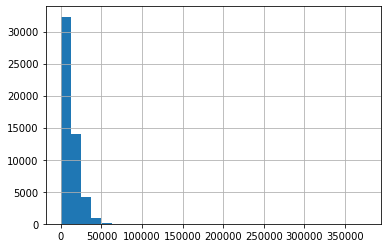

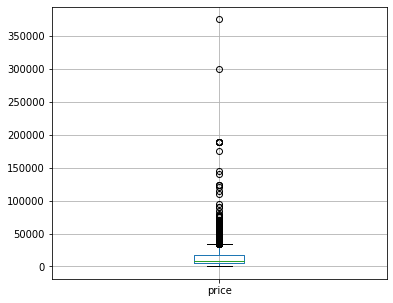

In [40]:
#Checking the column 'price'
import matplotlib.pyplot as plt
import numpy as np

df['price'].hist(bins=30)
plt.show()
df.boxplot(column=['price'], figsize=(6, 5))
plt.show()


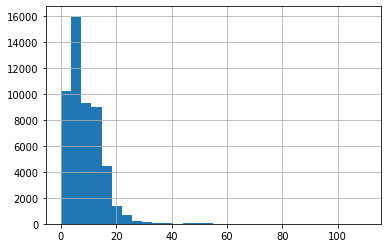

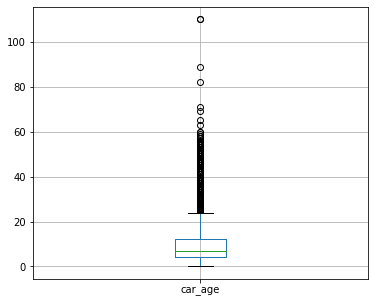

In [41]:
#Checking the column 'car_age'
import matplotlib.pyplot as plt
import numpy as np

df['car_age'].hist(bins=30)
plt.show()
df.boxplot(column=['car_age'], figsize=(6, 5))
plt.show()


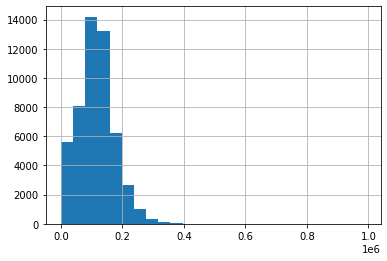

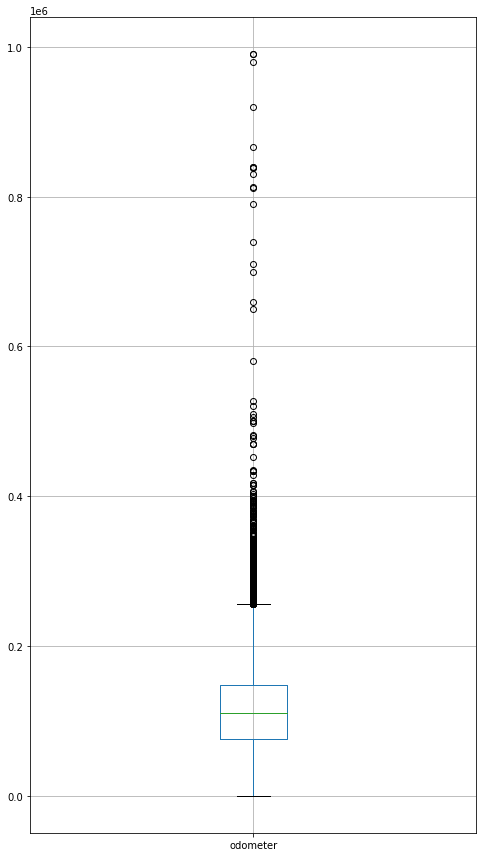

In [42]:
#Checking the column 'odometer'
import matplotlib.pyplot as plt
import numpy as np

df['odometer'].hist(bins=25)
plt.show()
df.boxplot(column=['odometer'], figsize=(8,15))
plt.show()



<AxesSubplot:>

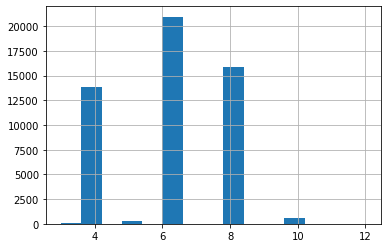

In [43]:
#Checking the column 'cylinders'
df['cylinders'].hist(bins=15)

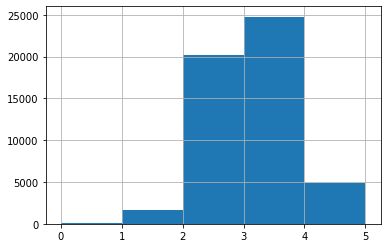

In [44]:
#Checking the column 'condition_new'

df['condition_new'].hist(bins=5)
plt.show()



## Study and take care of the missing values

As the graphs above show, we have columns where there are atypical values.

I will determine the lower, upper limits and create a dataframe without these atypical values.

In [45]:
# Determining the lower limit for atypical values age, odometer, price
IQR_car_age = df['car_age'].quantile(0.75) -  df['car_age'].quantile(0.25)
IQR_odometer = df['odometer'].quantile(0.75) -  df['odometer'].quantile(0.25)
IQR_price = df['price'].quantile(0.75) -  df['price'].quantile(0.25)

inf_car_age = df['car_age'].quantile(0.25)-1.5*IQR_car_age
inf_odometer = df['odometer'].quantile(0.25)-1.5*IQR_odometer
inf_price = df['price'].quantile(0.25)-1.5*IQR_price


In [46]:
# Determining the upper limit for atypical values
sup_car_age = df['car_age'].quantile(0.75)+1.5*IQR_car_age
sup_odometer = df['odometer'].quantile(0.75)+1.5*IQR_odometer
sup_price = df['price'].quantile(0.75)+1.5*IQR_price



In [47]:
# Storing the data without the atypical values in a separate DataFrame

estudo = df.query('(car_age < @sup_car_age) and (odometer < @sup_odometer) and (price < @sup_price)') 
estudo.describe()




,price,model_year,cylinders,odometer,is_4wd,days_listed,new_day,new_month,new_year,car_age,media_km,condition_new
count,48149.000000,48149.000000,48149.000000,48149.000000,48149.000000,48149.000000,48149.000000,48149.000000,48149.000000,48149.000000,48149.000000,48149.000000
mean,11255.842281,2010.150117,6.061632,113626.888232,0.485161,39.538827,15.453239,6.633783,2018.306507,8.156390,18734.448379,2.637666
std,7829.979364,4.957862,1.573383,53103.585138,0.499785,28.209627,8.740879,3.472538,0.461048,4.971482,15371.843808,0.697506
min,1.000000,1995.000000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2018.000000,0.000000,0.000000,0.000000
25%,5000.000000,2007.000000,4.000000,78600.000000,0.000000,19.000000,8.000000,3.000000,2018.000000,4.000000,10600.000000,2.000000
50%,8995.000000,2011.000000,6.000000,111833.000000,0.000000,33.000000,15.000000,7.000000,2018.000000,7.000000,14910.615385,3.000000
75%,15995.000000,2014.000000,8.000000,146000.000000,1.000000,53.000000,23.000000,10.000000,2019.000000,11.000000,21528.000000,3.000000
max,34595.000000,2019.000000,12.000000,256000.000000,1.000000,271.000000,31.000000,12.000000,2019.000000,23.000000,195700.000000,5.000000


In [48]:
df.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed,new_day,new_month,new_year,car_age,media_km,condition_new
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525.00000,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000
mean,12132.464920,2009.816419,6.125235,115199.014508,0.496303,39.55476,15.449491,6.628491,2018.307462,8.491043,18931.848574,2.637535
std,10040.803015,6.091605,1.573327,60484.863376,0.499991,28.20427,8.736521,3.474134,0.461447,6.105618,16241.726320,0.712447
min,1.000000,1908.000000,3.000000,0.000000,0.000000,0.00000,1.000000,1.000000,2018.000000,0.000000,0.000000,0.000000
25%,5000.000000,2007.000000,4.000000,75668.000000,0.000000,19.00000,8.000000,3.000000,2018.000000,4.000000,10440.500000,2.000000
50%,9000.000000,2011.000000,6.000000,110908.000000,0.000000,33.00000,15.000000,7.000000,2018.000000,7.000000,15000.000000,3.000000
75%,16839.000000,2014.000000,8.000000,147821.000000,1.000000,53.00000,23.000000,10.000000,2019.000000,12.000000,21772.333333,3.000000
max,375000.000000,2019.000000,12.000000,990000.000000,1.000000,271.00000,31.000000,12.000000,2019.000000,110.000000,373200.000000,5.000000


## Study the fundamental parameters without atypical values

Let's use the filtered data to make new graphs. Compare with the previous ones (which include atypical values). we will draw conclusions for each one.

array([[<AxesSubplot:title={'center':'car_age'}>]], dtype=object)

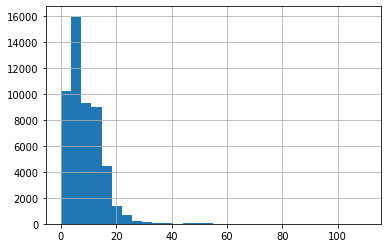

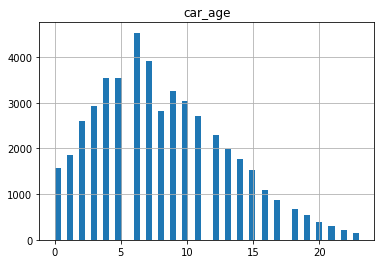

In [49]:
#Verifying car_age without atypical values
df['car_age'].hist(bins=30)

estudo.hist('car_age', bins=50)


array([[<AxesSubplot:title={'center':'odometer'}>]], dtype=object)

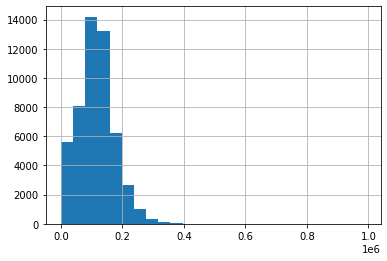

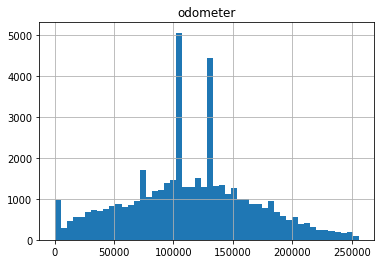

In [50]:
#Verifying odometer without atypical values
df['odometer'].hist(bins=25)

estudo.hist('odometer', bins=50)

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

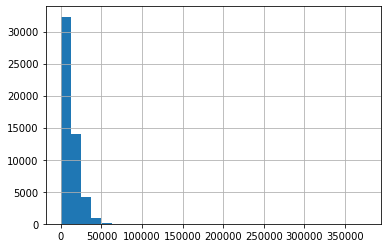

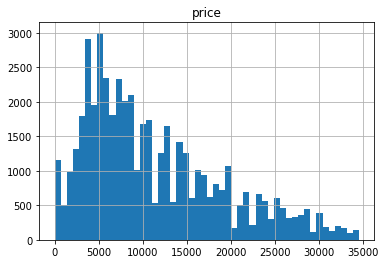

In [51]:
#Verifying price without atypical values

df['price'].hist(bins=30)

estudo.hist('price', bins=50)

## Lifetime of advertisements

In [52]:
estudo['days_listed'].describe()

count    48149.000000
mean        39.538827
std         28.209627
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

<AxesSubplot:>

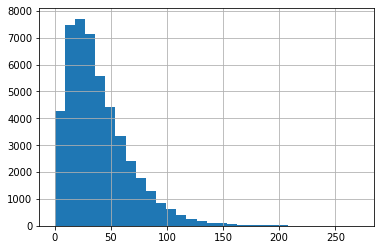

In [53]:
estudo['days_listed'].hist(bins=30)

The lifetime of an advertisement can be studied through a very simple process. After applying a describe in days_listed we can see that its average is 39.53 while the median is 33.

To facilitate our analysis I created a histogram that allows us to check more easily where there is a higher percentage of advertising days. We can see that the peak is between approximately 10 and 40 days where there is a very high value of advertising and that from that number of days the value will decrease to the peak from 50 days. I can then conclude that this histogram has a normal distribution since the peaks are all located on the left side of the graph which also makes me conclude that most of the advertisements were quickly removed in these intervals.

## Average prices for each type of vehicle

In [54]:
price_and_vehicle = df.pivot_table(index='type', values='price', aggfunc=['count', 'mean'] )

price_and_vehicle.reset_index().sort_values(by=('count', 'price'), ascending=False)


,type,count,mean
,,price,price
0,SUV,12405,11149.400000
10,truck,12353,16734.894924
9,sedan,12154,6965.358647
8,pickup,6988,16057.410418
3,coupe,2303,14353.442901
12,wagon,1541,9088.134328
5,mini-van,1161,8193.177433
4,hatchback,1047,6868.513849
11,van,633,10546.941548


Text(0, 0.5, 'Numero de propagandas')

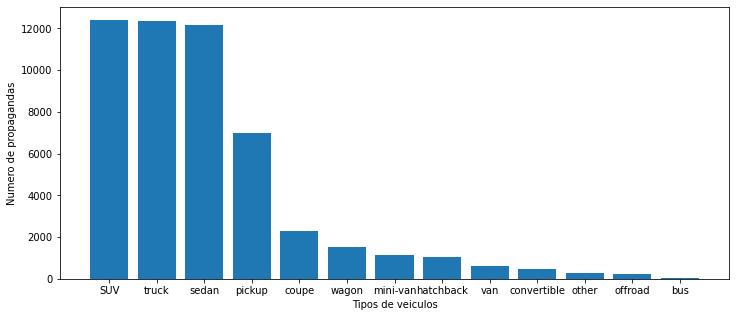

In [55]:
#Creating a graph that allows an analysis of the relationship of the number of advertisements and type of vehicle

propagandas = [12405, 12353, 12154, 6988, 2303, 1541, 1161, 1047, 633, 446, 256, 214, 24]
veiculos = ['SUV', 'truck', 'sedan', 'pickup', 'coupe', 'wagon', 'mini-van', 'hatchback', 'van', 'convertible', 'other', 'offroad', 'bus']
fig=plt.figure(figsize=(12,5))
plt.bar(veiculos, propagandas)

plt.xlabel('Tipos de veiculos', fontsize=10)
plt.ylabel('Numero de propagandas', fontsize=10)

In [56]:
type_suv = df.query('type in "SUV"')
type_suv.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,new_day,new_month,new_year,car_age,media_km,condition_new
0,9400,2011.0,bmw x5,good,6.000000,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19,23,6,2018,7.0,20714.285714,2
7,15990,2013.0,honda pilot,excellent,6.000000,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68,7,1,2019,6.0,18245.500000,3
8,11500,2012.0,kia sorento,excellent,4.000000,gas,104174.0,automatic,SUV,unknown,1.0,2018-07-16,19,16,7,2018,6.0,17362.333333,3
9,9200,2008.0,honda pilot,excellent,6.125235,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17,15,2,2019,11.0,13381.000000,3
14,12990,2009.0,gmc yukon,excellent,8.000000,gas,132285.0,automatic,SUV,black,1.0,2019-01-31,24,31,1,2019,10.0,13228.500000,3
17,13990,2014.0,jeep cherokee,excellent,6.000000,gas,100669.0,automatic,SUV,red,1.0,2018-08-16,25,16,8,2018,4.0,25167.250000,3
18,12500,2013.0,chevrolet traverse,excellent,6.000000,gas,128325.0,automatic,SUV,white,1.0,2019-04-09,13,9,4,2019,6.0,21387.500000,3
20,6990,2012.0,chevrolet tahoe,excellent,8.000000,gas,147485.0,automatic,SUV,silver,1.0,2018-08-05,28,5,8,2018,6.0,24580.833333,3
21,5250,2007.0,toyota rav4,good,6.000000,gas,154000.0,automatic,SUV,unknown,0.0,2018-08-22,8,22,8,2018,11.0,14000.000000,2
23,7500,2004.0,jeep wrangler,good,6.000000,gas,129000.0,automatic,SUV,red,1.0,2018-05-17,39,17,5,2018,14.0,9214.285714,2


In [57]:
type_truck = df.query('type in "truck"')
type_truck.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,new_day,new_month,new_year,car_age,media_km,condition_new
22,7500,2004.0,chevrolet silverado,like new,8.0,gas,180000.0,automatic,truck,red,1.0,2019-01-05,64,5,1,2019,15.0,12000.000000,4
39,8000,2009.0,ford f-150,good,8.0,gas,234000.0,automatic,truck,black,1.0,2019-03-31,1,31,3,2019,10.0,23400.000000,2
50,6200,2006.0,ford f-150,excellent,6.0,gas,69698.0,automatic,truck,custom,0.0,2018-05-03,50,3,5,2018,12.0,5808.166667,3
53,10400,2012.0,chevrolet colorado,excellent,5.0,gas,111871.0,automatic,truck,red,1.0,2019-01-30,27,30,1,2019,7.0,15981.571429,3
60,13000,2005.0,ram 1500,good,8.0,gas,146000.0,automatic,truck,grey,1.0,2019-03-14,26,14,3,2019,14.0,10428.571429,2
61,16999,2013.0,chevrolet silverado 1500,good,8.0,gas,137230.0,automatic,truck,white,1.0,2018-05-29,24,29,5,2018,5.0,27446.000000,2
66,14999,2013.0,chevrolet silverado 3500hd,good,8.0,gas,129000.0,automatic,truck,white,1.0,2018-05-09,22,9,5,2018,5.0,25800.000000,2
67,14950,2012.0,ram 1500,excellent,8.0,gas,114773.0,automatic,truck,grey,1.0,2019-04-09,85,9,4,2019,7.0,16396.142857,3
69,7800,2014.0,ford f-150,like new,8.0,gas,97510.0,automatic,truck,white,1.0,2019-02-20,39,20,2,2019,5.0,19502.000000,4
79,16500,2012.0,ford f-250 sd,good,8.0,gas,123262.0,automatic,truck,silver,1.0,2018-09-25,47,25,9,2018,6.0,20543.666667,2


## Price factors

Next we will create some correlation matrices to verify factors that influence the price of the two most popular car types studied above.

<AxesSubplot:xlabel='car_age', ylabel='price'>

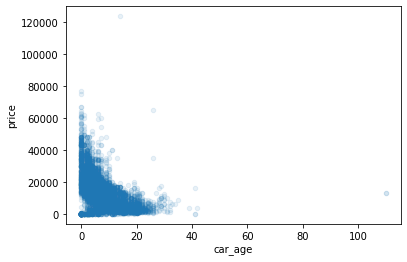

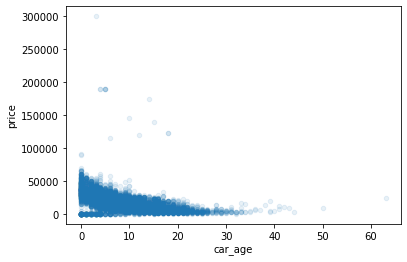

In [58]:
#correlation in car_age
type_suv.plot(y='price',x='car_age',kind='scatter',alpha=0.1)
type_truck.plot(y='price',x='car_age',kind='scatter',alpha=0.1)

<AxesSubplot:xlabel='condition', ylabel='price'>

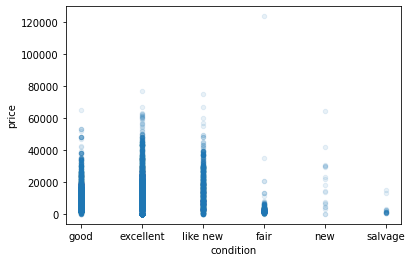

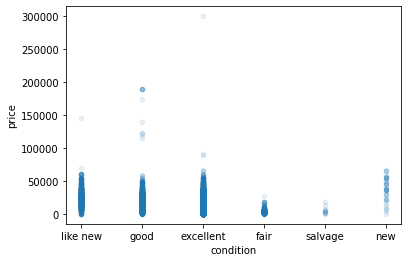

In [59]:
#correlation in condition
type_suv.plot(y='price',x='condition',kind='scatter',alpha=0.1)
type_truck.plot(y='price',x='condition',kind='scatter',alpha=0.1)

<AxesSubplot:xlabel='odometer', ylabel='price'>

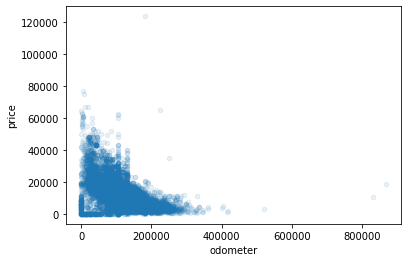

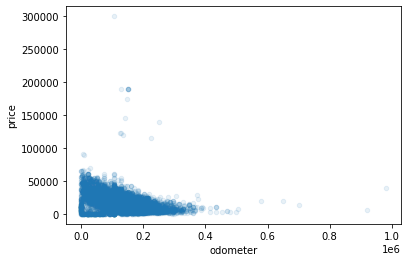

In [60]:
#correlation in odometer
type_suv.plot(y='price',x='odometer',kind='scatter',alpha=0.1)
type_truck.plot(y='price',x='odometer',kind='scatter',alpha=0.1)

<AxesSubplot:title={'center':'price'}, xlabel='transmission'>

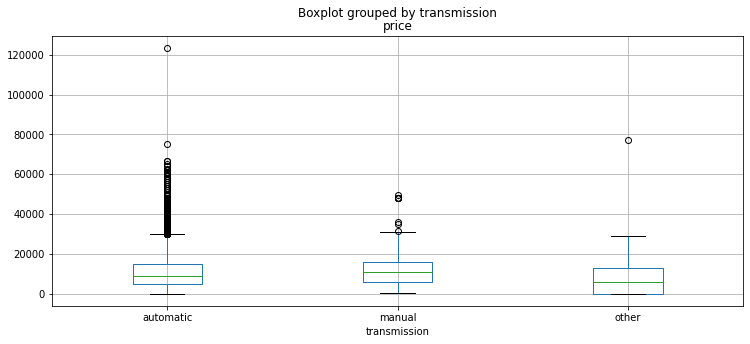

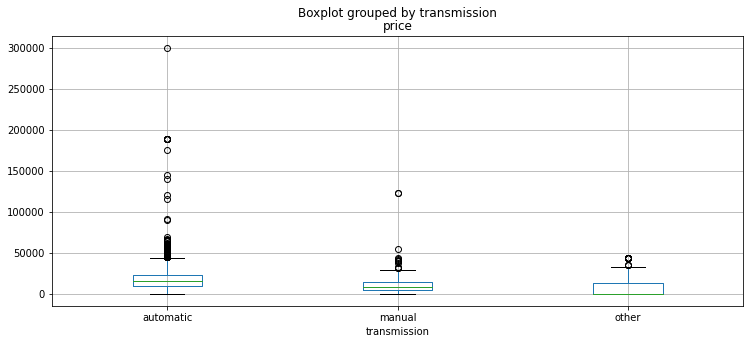

In [61]:
#correlation in transmission
type_suv.boxplot('price',by='transmission',figsize=(12,5))
type_truck.boxplot('price',by='transmission',figsize=(12,5))

<AxesSubplot:title={'center':'price'}, xlabel='paint_color'>

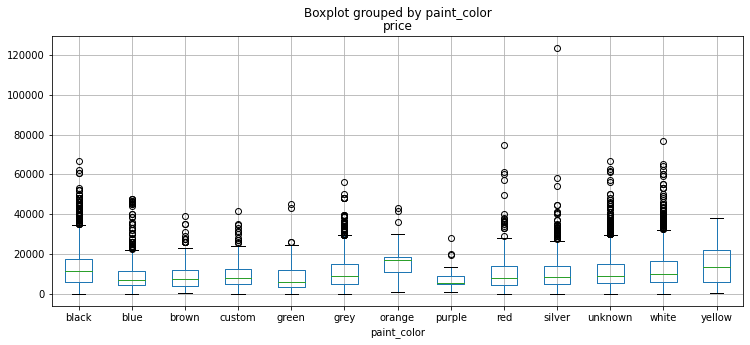

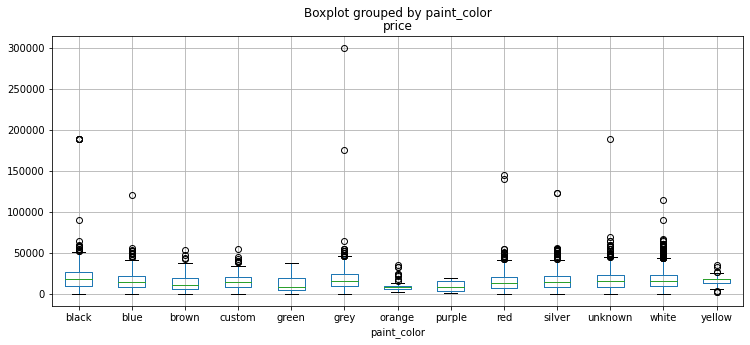

In [62]:
#correlation in paint_color
type_suv.boxplot('price',by='paint_color',figsize=(12,5))
type_truck.boxplot('price',by='paint_color',figsize=(12,5))

For the types of cars (SUV and Truck), in my opinion, the factors that most impact the price are:

- The age of the car, it is visible that the younger the car is, the more expensive it is.

- In the car's wheel, the more km it has, the cheaper it gets.

- A curious fact in this type of car focusses on the condition column, there are very high price values in cars that do not have a new condition.

- Colour could be a factor that would influence the price but we have a lot of data that were previously absent in this column, which means that there is a large concentration of values in colours that we do not know what they are. 

- To top it off, it is very evident that the type of transmission influences a lot on the price of the car.


After an initial exploration of the data in our table, I started by checking missing values and thinking about how I would replace them.

In the model_year column I created a pivot table that calculated the median between the condition and year of the model of the car. After that I created a function that would replace these missing values through some conditions.

In the missing values of the cylinders column, it only replaces the missing values by the average of the cylinders.

In the odometer column I did a study similar to the model_year column.

To replace the missing values of the car colour, replace these values with unknown since we had no way to find the colour of these cars unless we had a catalogue with photos of each car.

For the last column with missing data, I assumed that 1 would be for cars with 4 wheel drive and as there was only this single value, I chose to use 0 as a value for cars without 4 wheel drive.

I also corrected the data type in the date_posted column for a date type.

To make it easier to search our data, I created a column with the age of each car at the time of posting, calculated the annual average of kilometres travelled and replaced the values in the condition column with numerical values.

Through histograms and boxplots I found that there were some atypical values that were hindering our research, to improve the analysis of this data, I calculated the upper and lower limits of each atypical value to then create a DataFrame that allowed me to store values that were not atypical for future analysis.

Finally, we can verify that the number of kilometres, the condition of the car, its age and type of transmission greatly influences the price of the vehicle.